<IPython.core.display.Javascript object>


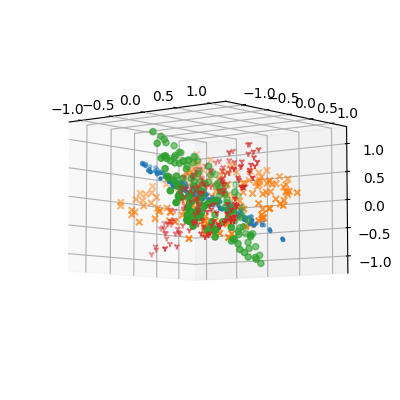

In [10]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

def render_pcl(data, indexing, ax=None):
    _indexing = np.zeros(indexing.shape, dtype=np.int)
    index_mapping, index_ctr = {}, 0
    for vertex, index in enumerate(indexing):
        if index not in index_mapping:
            index_mapping[index] = index_ctr
            index_ctr += 1
        _indexing[vertex] = index_mapping[index]
    if ax is None:
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111, projection='3d')
    markers = [".","x","o","1","2","3","4"]
    for part_idx in range(index_ctr+1):
        samples = data[_indexing == part_idx]
        ax.scatter(samples[:,0], 
                   samples[:,1], 
                   samples[:,2], 
                   marker=markers[part_idx%len(markers)])

        
data,ground_truth = generate_points([0.01,0.01,0.01,0.01],
                                    [150,150,150,150])
render_pcl(data,ground_truth)

0 0.048270940859023476
100 0.010716842646277296
200 -0.005275924476982509
300 -0.006762868979290751
400 -0.006294078652845002
500 -0.007219988802632986
600 -0.006939551331558888
700 -0.007596770478152686
800 -0.007463632318650062
900 -0.006544730012824391
1000 -0.0076606078561240526
1100 -0.007734377923048936
1200 -0.007304203044421314
1300 -0.008032145528680848
1400 -0.007472800207154493
1500 -0.008534299381715736
1600 -0.007453883560134289
1700 -0.007439962353408251
1800 -0.008921961477060595
1900 -0.00838313458534031
2000 -0.008763275201670117
2100 -0.0091955549811942
2200 -0.008446979094944053
2300 -0.009035424801595398
2400 -0.008605113169412306
2500 -0.009232311295078574
2600 -0.008375903257889868
2700 -0.009181474767348721
2800 -0.008955018935260677
2900 -0.008897683301698434


<IPython.core.display.Javascript object>


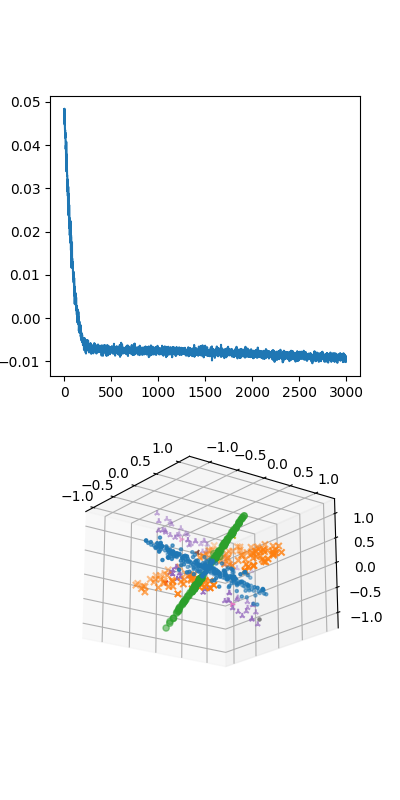

In [11]:
from mlcv import neighbours, generate_points
from mlcv import sample_reduced_cost, cf, \
                 cf_prime, sample_cost, cost, \
                 reduced_cost

def cf_prime_(data,combs):
     return cf_prime(data,combs,dthr=0.15)

def cf_(data,combs):
    return cf(data,combs)

def best_move(data, 
              indexing, 
              cf, cf_prime, 
              max_candidates=20, 
              uw_sample_count=30):
    vs, ks = [], []
    for idx,(v,k) in enumerate(neighbours(indexing, randomize=True)):
        if idx >= max_candidates:
            break
        vs.append(v)
        ks.append(k)
    
    costs = sample_reduced_cost(data, 
                                indexing, 
                                cf, cf_prime, 
                                np.array(vs), 
                                np.array(ks), 
                                uw_sample_count=uw_sample_count)
    bestpair, best_rcost = None, None
    for rc,v,k in zip(costs,vs,ks):
        if bestpair is None or rc > best_rcost:
            bestpair = v,k
            best_rcost = rc
    return bestpair, best_rcost

indexing = np.zeros(data.shape[0], dtype=np.int)

costs = []
for idx in range(3000):
    (v,k),c = best_move(data,
                        indexing,
                        cf_,cf_prime_,
                        max_candidates=20,
                        uw_sample_count=10000)
    if c > 0:
        indexing[v] = k
        
    costs.append(sample_cost(data, 
                             indexing, 
                             cf_, 
                             cf_prime_,
                             uvw_sample_count=10000))
    
    

    if idx%100 == 0:
        print(idx, costs[-1])

fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2, projection='3d')
ax1.plot(np.arange(len(costs)), costs)
render_pcl(data, indexing, ax=ax2)